<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/czyzewska/Drzewa_Decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
import pandas as pd
import math
from sklearn.metrics import median_absolute_error

In [2]:
iris = datasets.load_iris()

#Dataframe
features = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=["target"])

#połacz dane w jeden df
data = pd.concat([features, target], axis=1)

In [3]:
data.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


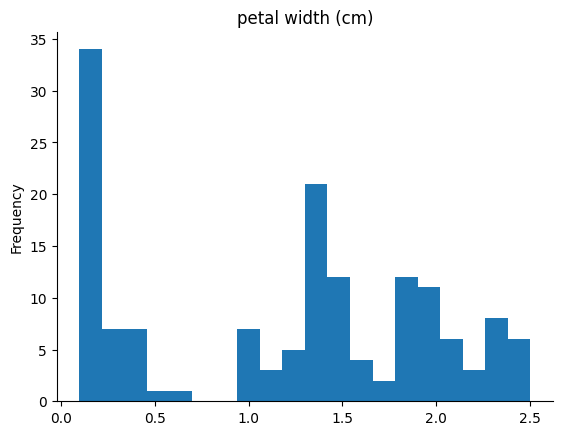

In [4]:
# @title petal width (cm)

from matplotlib import pyplot as plt
data['petal width (cm)'].plot(kind='hist', bins=20, title='petal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

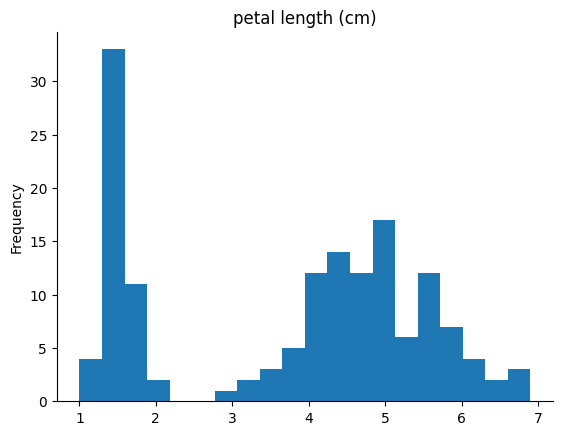

In [5]:
# @title petal length (cm)

from matplotlib import pyplot as plt
data['petal length (cm)'].plot(kind='hist', bins=20, title='petal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

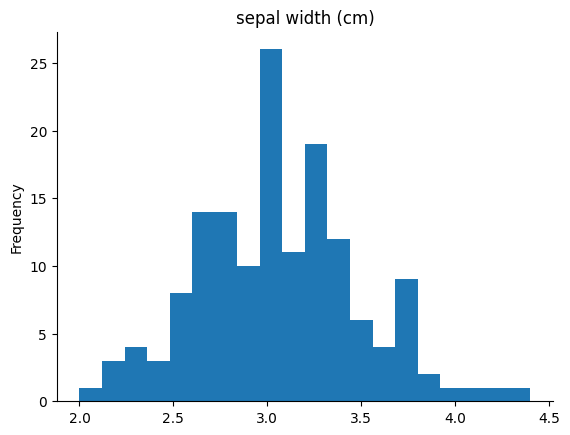

In [6]:
# @title sepal width (cm)

from matplotlib import pyplot as plt
data['sepal width (cm)'].plot(kind='hist', bins=20, title='sepal width (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

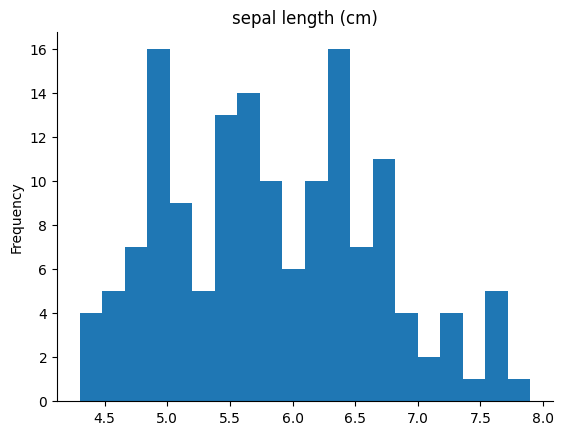

In [7]:
# @title sepal length (cm)

from matplotlib import pyplot as plt
data['sepal length (cm)'].plot(kind='hist', bins=20, title='sepal length (cm)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [8]:
# Entropia przed podziałem dla 0,5
target_probs = data["target"].value_counts(normalize=True)
entropy_before = -sum(target_probs * target_probs.map(lambda p: math.log(p, 2)))

#dla 0,5
subset_A = data[data["petal width (cm)"] <= 0.5]
subset_B = data[data["petal width (cm)"] > 0.5]

entropy_A = -sum(
    subset_A["target"].value_counts(normalize=True) *
    subset_A["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2))
)

entropy_B = -sum(
    subset_B["target"].value_counts(normalize=True) *
    subset_B["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2))
)

In [9]:
average_entropy = (entropy_A + entropy_B) / 2


In [10]:
#zysk informacyjny
info_gain_05 = entropy_before - average_entropy



In [11]:
# Entropia dla 0,38
# Calculate entropy for the second split (petal width <= 0.38)
subset_AA = data[data["petal width (cm)"] <= 0.38]
subset_BB = data[data["petal width (cm)"] > 0.38]

entropy_AA = -sum(
    subset_AA["target"].value_counts(normalize=True) *
    subset_AA["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2))
)

entropy_BB = -sum(
    subset_BB["target"].value_counts(normalize=True) *
    subset_BB["target"].value_counts(normalize=True).map(lambda p: math.log(p, 2))
)

In [12]:
average_entropy_2 = (entropy_AA + entropy_BB) / 2

In [13]:
#zysk informacyjny
info_gain_038 = entropy_before - average_entropy_2

In [14]:
print("Entropia a:", entropy_A)
print("Entropia b:", entropy_B)
print("Średnia entropia dla podziału 0,5:", average_entropy)
print("Zysk informacyjny dla podziału 0,5:", info_gain_05)

print("entropia a2:", entropy_AA)
print("entropia b2:", entropy_BB)
print("Średnia entropia dla podziału 0,38: ", average_entropy_2)
print("Zysk informacyjny dla podziału 0,38: ", info_gain_038)

Entropia a: -0.0
Entropia b: 1.0702350572322654
Średnia entropia dla podziału 0,5: 0.5351175286161327
Zysk informacyjny dla podziału 0,5: 1.0498449721050234
entropia a2: -0.0
entropia b2: 1.3285976826626762
Średnia entropia dla podziału 0,38:  0.6642988413313381
Zysk informacyjny dla podziału 0,38:  0.920663659389818


3. Zaimplementuj drzewo decyzyjne i las losowy (złożony z 15 drzew); przetestuj na 30% zbiorze testowym

In [15]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Dokładność drzewa decyzyjnego:", accuracy_dt)


Dokładność drzewa decyzyjnego: 1.0


In [19]:
random_forest = RandomForestClassifier(n_estimators=15, random_state=42)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Dokładność:", accuracy_rf)

Dokładność: 1.0
